In [18]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

In [20]:

df = pd.read_csv("breast-cancer-dataset/breast-cancer.xls")

In [22]:
df.head(1)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

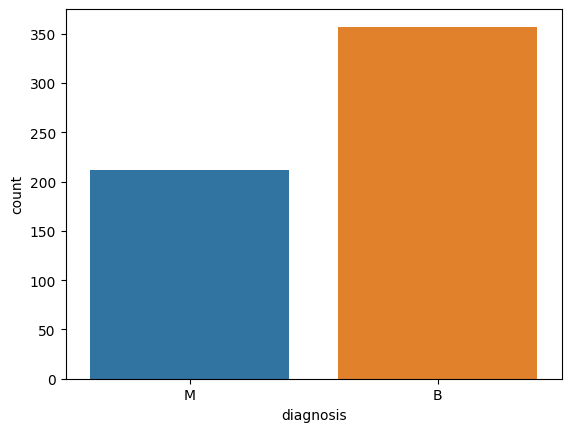

In [25]:
sns.countplot(x="diagnosis", data=df)

Observation: Dataset has more B entries than M entries

<AxesSubplot:xlabel='area_mean', ylabel='Count'>

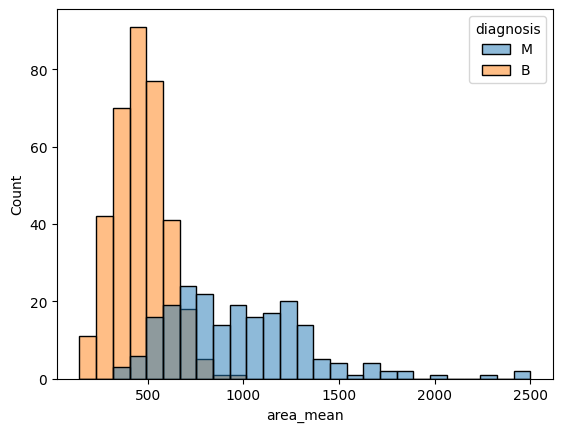

In [40]:
sns.histplot(data=df, x="area_mean", hue="diagnosis")

Observation: B entries have more area_mean than M entries, though almost all M entries have area_mean than 1000

<AxesSubplot:xlabel='radius_mean', ylabel='Count'>

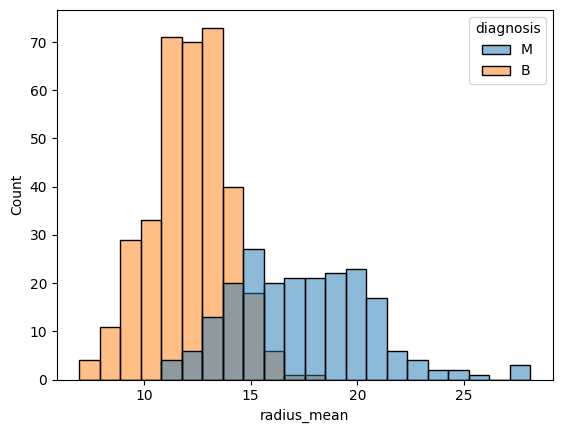

In [41]:
sns.histplot(data=df, x="radius_mean", hue="diagnosis")

Observation: 

<AxesSubplot:xlabel='perimeter_mean', ylabel='Count'>

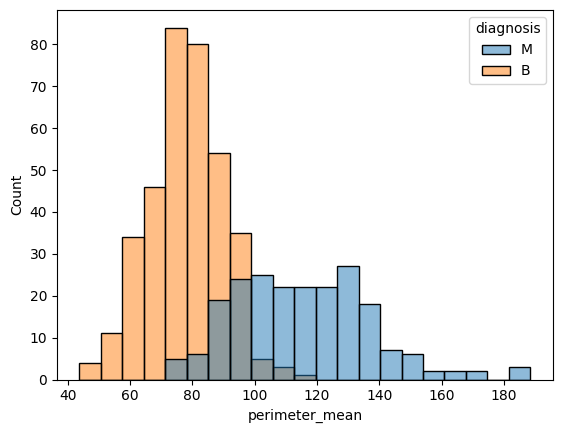

In [42]:
sns.histplot(data=df, x="perimeter_mean", hue="diagnosis")

<AxesSubplot:xlabel='smoothness_mean', ylabel='Count'>

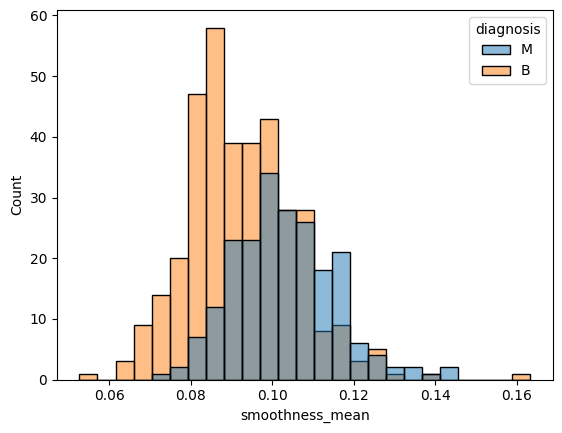

In [43]:
sns.histplot(data=df, x="smoothness_mean", hue="diagnosis")

<AxesSubplot:xlabel='texture_mean', ylabel='Count'>

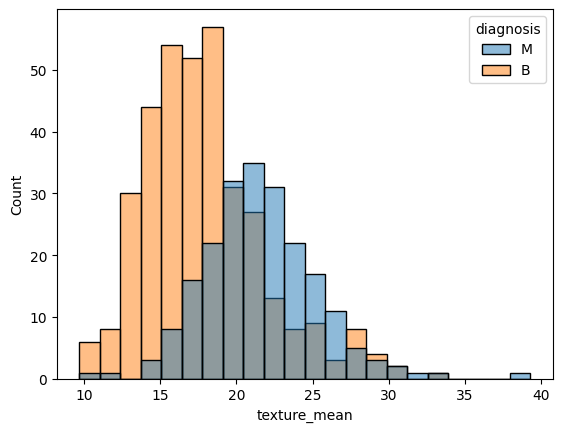

In [44]:
sns.histplot(data=df, x="texture_mean", hue="diagnosis")

<AxesSubplot:xlabel='concavity_worst'>

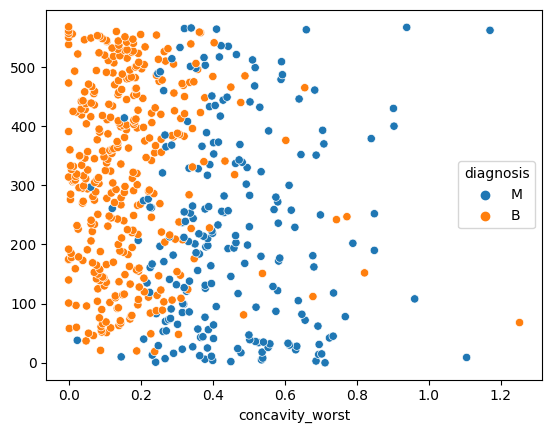

In [56]:
sns.scatterplot(data=df, x="concavity_worst", y=df.index, hue="diagnosis")

<AxesSubplot:xlabel='fractal_dimension_worst'>

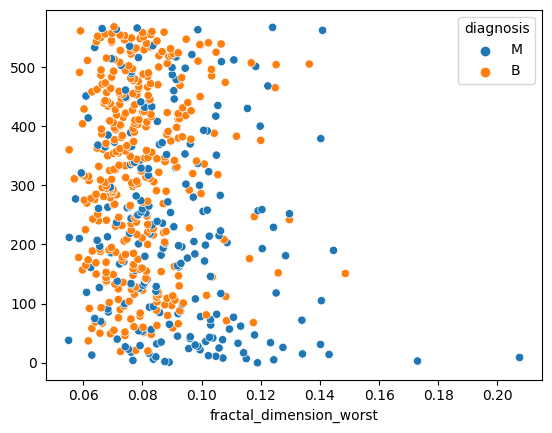

In [57]:
sns.scatterplot(data=df, x="fractal_dimension_worst", y=df.index, hue="diagnosis")

<AxesSubplot:xlabel='symmetry_worst'>

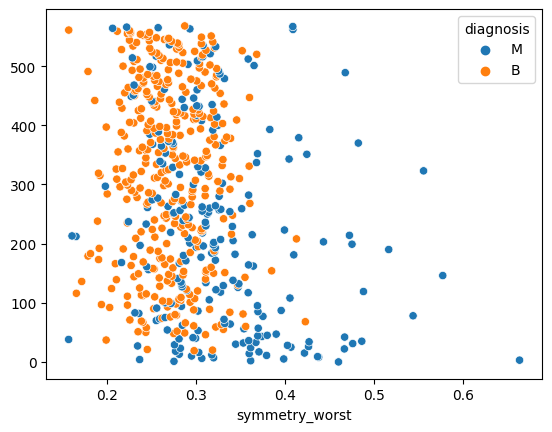

In [59]:
sns.scatterplot(data=df, x="symmetry_worst", y=df.index, hue="diagnosis")

### Data Preprocessing

In [61]:
df.drop("id", axis=1, inplace=True)

In [66]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


In [69]:
df["diagnosis"] = (df["diagnosis"] == "M").astype(int)

In [71]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.000000,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [72]:
correlation = df.corr()

<AxesSubplot:>

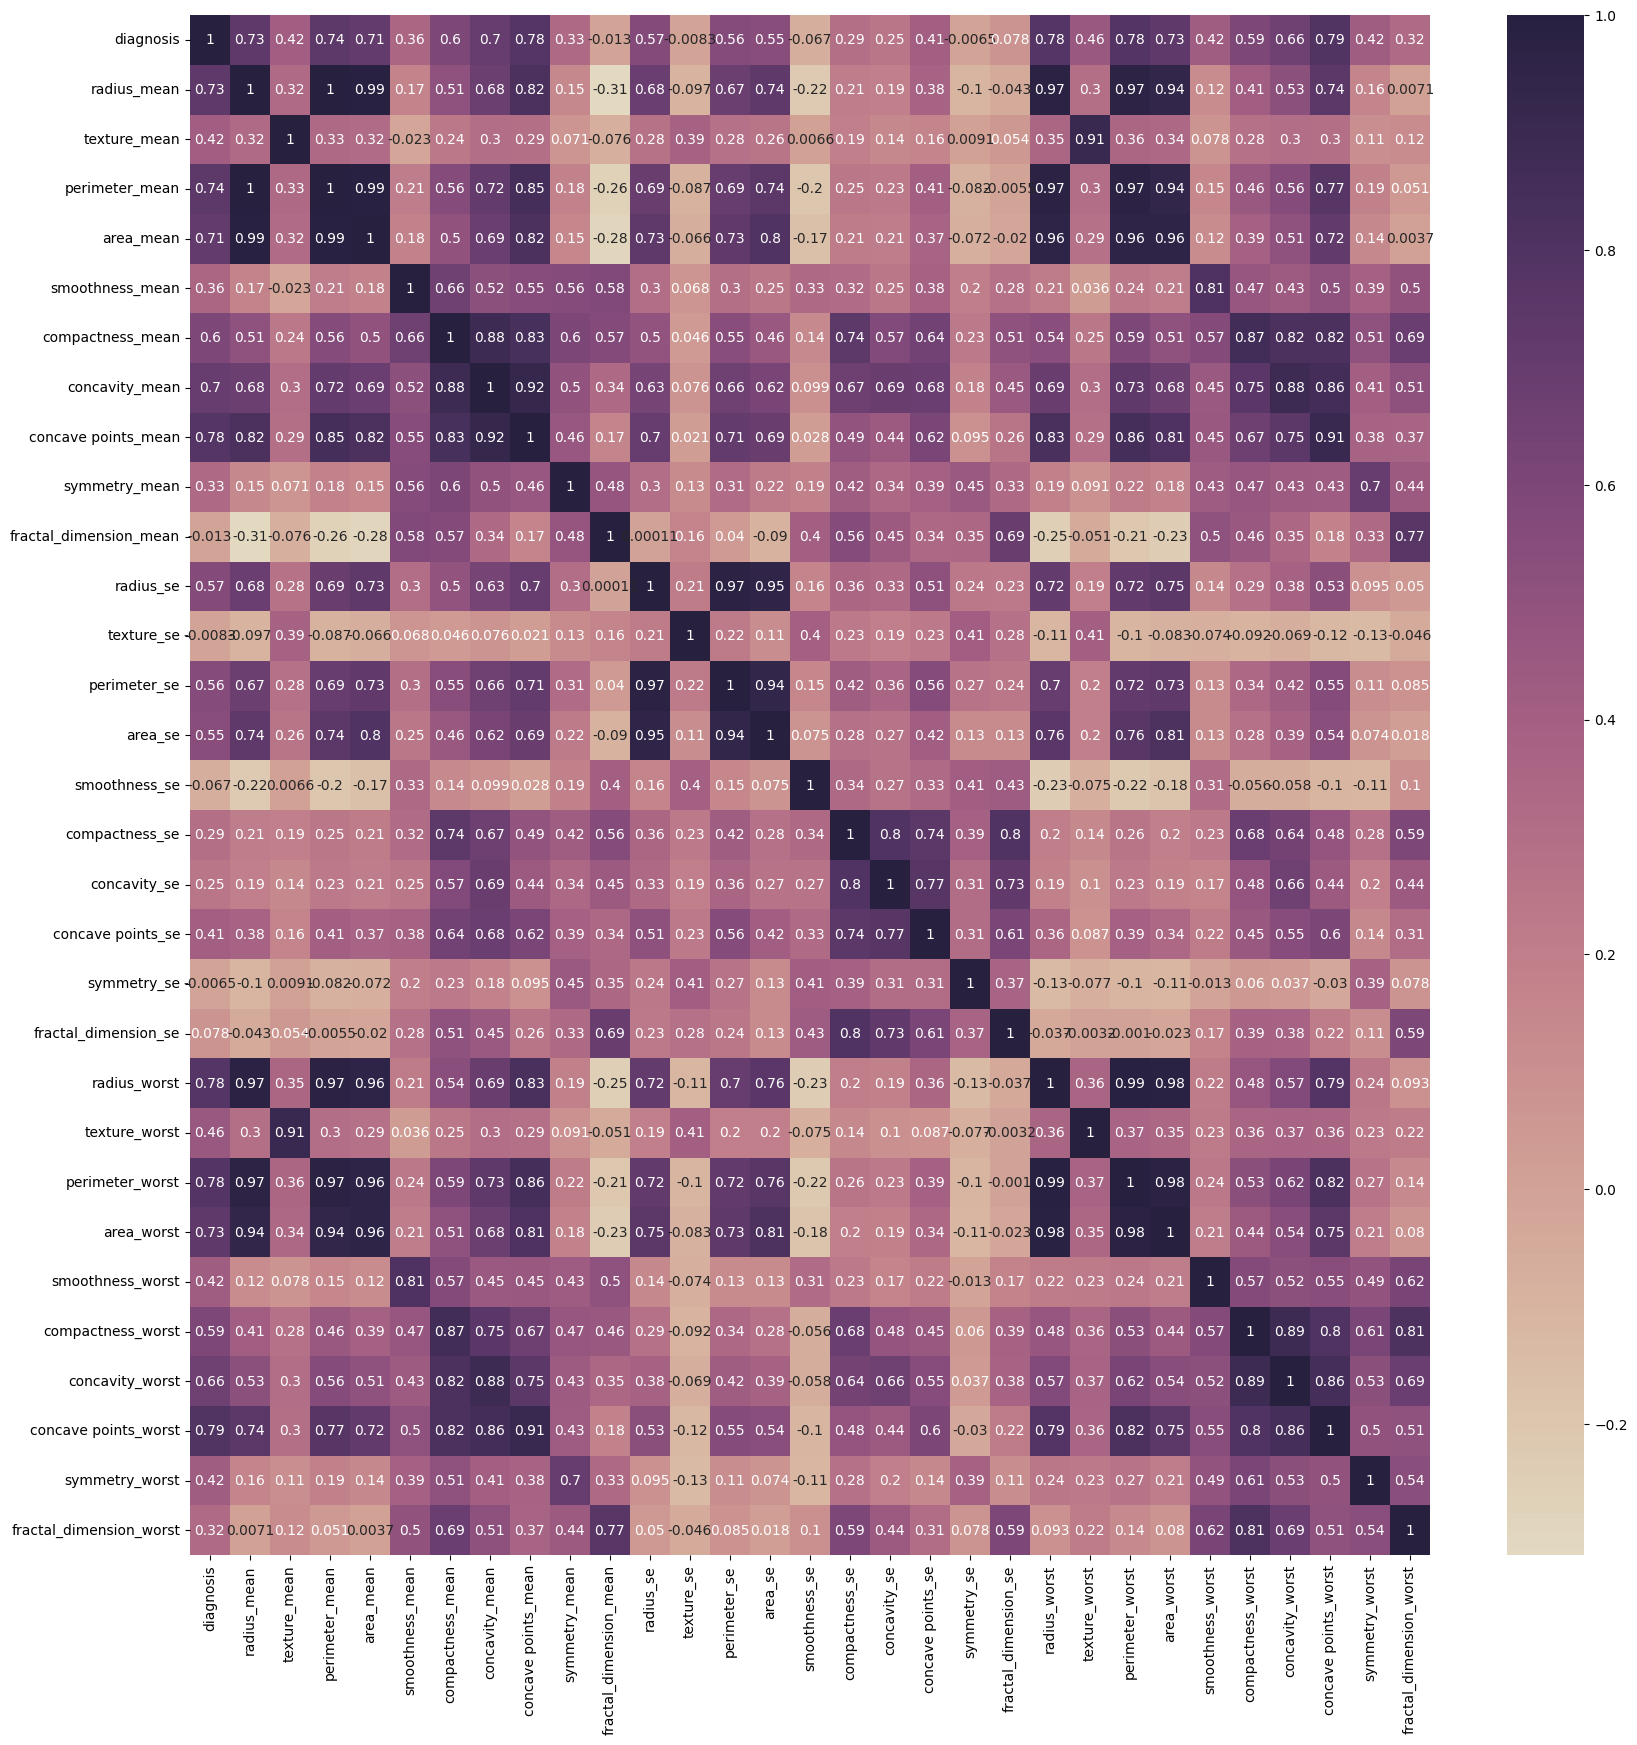

In [79]:
plt.figure(figsize=(20,20))  # this helped increase the dimensions of the result for better readability
sns.heatmap(correlation, annot=True, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

In [80]:
cor_target = abs(correlation["diagnosis"])

In [87]:
# correlation of each feature with the target
cor_target[1:].sort_values(ascending=False)

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0.067016
fractal_dimension_mean     0

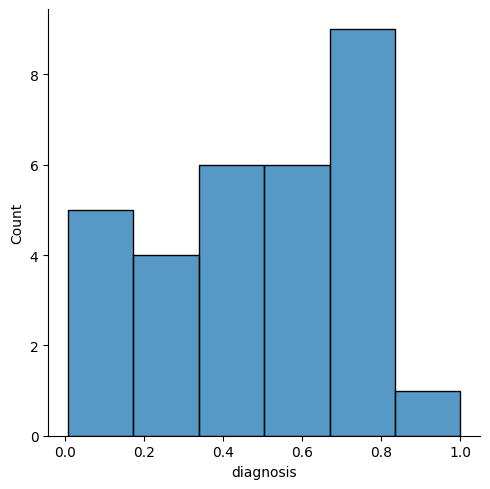

In [96]:
sns.displot(data=cor_target[1:], x=cor_target)

In [100]:
relevant_features = cor_target[1:][cor_target > 0.4]

In [101]:
relevant_features

radius_mean             0.730029
texture_mean            0.415185
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
concave points_se       0.408042
radius_worst            0.776454
texture_worst           0.456903
perimeter_worst         0.782914
area_worst              0.733825
smoothness_worst        0.421465
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
symmetry_worst          0.416294
Name: diagnosis, dtype: float64

In [111]:
required_columns = relevant_features.index

In [112]:
X = df[required_columns]
y = df["diagnosis"]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [117]:
# scaling data
scalar = StandardScaler()
scalar.fit(X_train)

StandardScaler()

In [118]:
scalar.transform(X_train)
scalar.transform(X_test)

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.03583041,
        -0.19435087,  0.17275669],
       [ 1.36536344,  0.49866473,  1.30551088, ..., -0.02818105,
         0.99177862, -0.561211  ],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.4996247 ,
         0.57035018, -0.10783139],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.45033003,
        -0.27741059, -0.3820785 ],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ...,  0.15205697,
        -0.49027026, -1.60905688],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.33277307,
         0.7925579 , -0.05868885]])

In [119]:
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]],
                           columns=["accuracy", "f1", "precision", "recall", "balanced_accuracy"])
    return eval_df
    

In [123]:
lg = LogisticRegression(solver='lbfgs', max_iter=400)
results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

e:\Projects\machine-learning-engineer-roadmap\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [124]:
results.index = ['LogisticRegression']
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074


In [125]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = results.append(decision_tree_results)

C:\Users\amanj\AppData\Local\Temp\ipykernel_9624\435929117.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [126]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


In [127]:
KNN = KNeighborsClassifier(n_neighbors=12)
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearsNeighbors']
results = results.append(knn)
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

C:\Users\amanj\AppData\Local\Temp\ipykernel_9624\2945101259.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,accuracy,f1,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116


In [128]:
rfc = RandomForestClassifier()
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = results.append(rfc_result)

C:\Users\amanj\AppData\Local\Temp\ipykernel_9624\4199030462.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [129]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074


In [130]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

results = results.append(xgboost_result)

C:\Users\amanj\AppData\Local\Temp\ipykernel_9624\2815737095.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [131]:
results.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074


In [132]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

results = results.append(Naive_Bayes_result)

C:\Users\amanj\AppData\Local\Temp\ipykernel_9624\243440239.py:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [133]:
results.head(6).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
NaiveBayes,0.964912,0.951220,1.000000,0.906977,0.953488


In [134]:
results

,accuracy,f1,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
NaiveBayes,0.964912,0.951220,1.000000,0.906977,0.953488


#### Visualizing results

In [135]:
models = results.T.columns.values
models= models[0:7]

<AxesSubplot:xlabel='accuracy'>

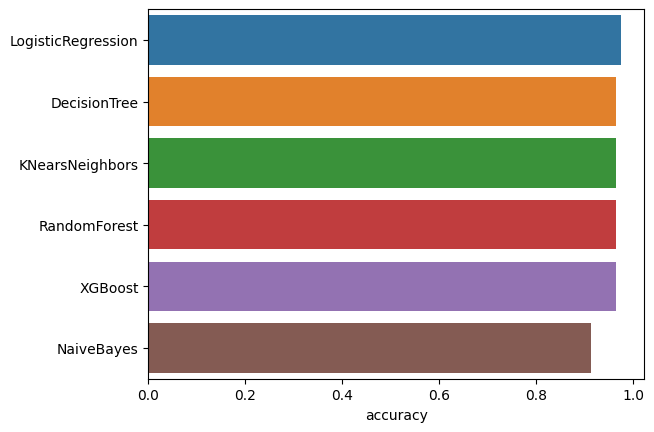

In [167]:
sns.barplot(data=results.sort_values(by="accuracy", ascending=False), x="accuracy", y=results.index)

<AxesSubplot:xlabel='f1'>

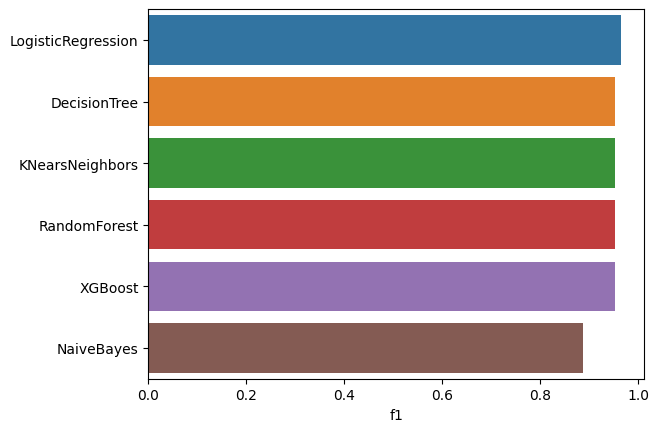

In [171]:
sns.barplot(data=results.sort_values(by="f1", ascending=False), x="f1", y=results.index)

<AxesSubplot:xlabel='precision'>

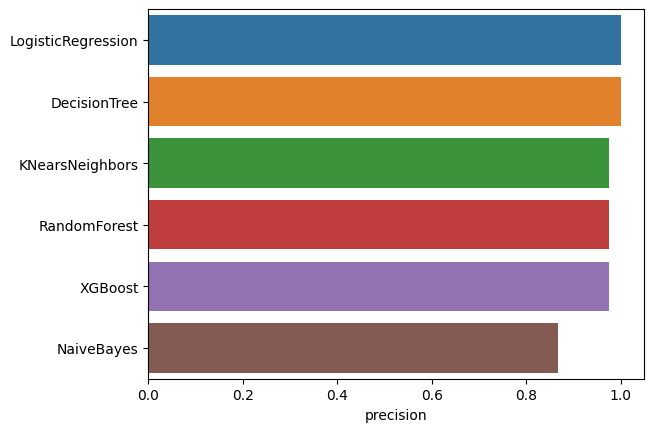

In [173]:
sns.barplot(data=results.sort_values(by="precision", ascending=False), x="precision", y=results.index)

<AxesSubplot:xlabel='recall'>

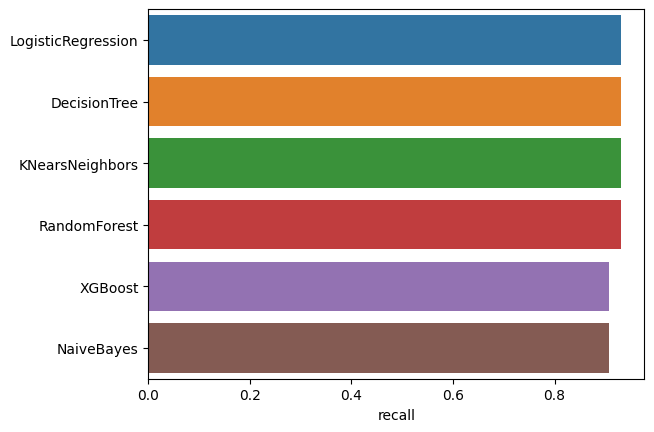

In [174]:
sns.barplot(data=results.sort_values(by="recall", ascending=False), x="recall", y=results.index)

<AxesSubplot:xlabel='balanced_accuracy'>

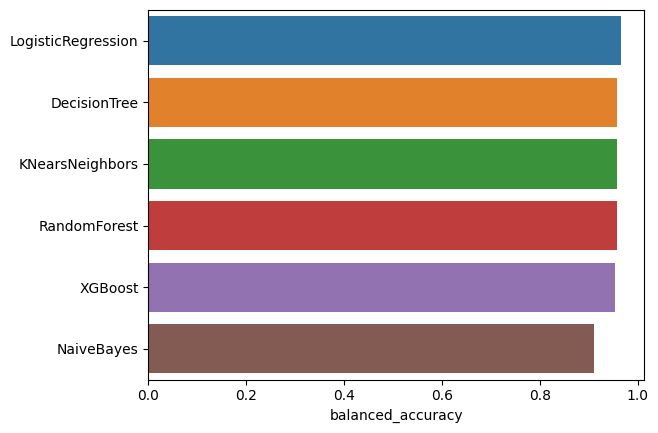

In [178]:
sns.barplot(data=results.sort_values(by="balanced_accuracy", ascending=False), x="balanced_accuracy", y=results.index)